<a href="https://colab.research.google.com/github/ABHAY7238/Road-to-Data-Scientist-/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-NEAREST NEIGHBORUS

K-Nearest Neighbors (KNN) is a simple, non-parametric machine learning algorithm that can be used for both classification and regression tasks. It works by finding the 'k' training examples that are closest to a new data point and using their labels or values to predict the label or value of the new point.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load the dataset
df = sns.load_dataset("iris")

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#split the data into x and y
x = df.drop("species",axis=1)
y = df["species"]

In [ ]:
import scipy

In [ ]:
#pip install scipy
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install scikit-learn

In [ ]:
#load and fit the knn classifier on the dataset
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x,y)

KNeighborsClassifier()

In [ ]:
#train test split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = KNeighborsClassifier(n_neighbors=5)
#fit the model
model.fit(x_train , y_train)

KNeighborsClassifier()

<Axes: >

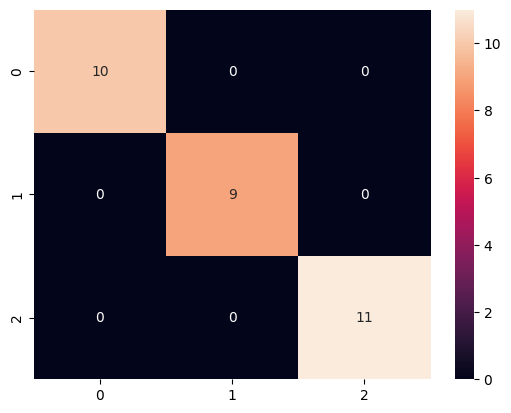

In [ ]:
#predict the species for the test data
y_pred = model.predict(x_test)
#evaluate the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
#plot the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

**Regression** using **knn**

In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#load the dataset
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#split the data
x = df.drop("tip",axis=1)
y = df["tip"]

In [ ]:
#encode the categorical column using for loop and le
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in x.columns:
  if x[i].dtype == "object" or x[i].dtype == "category":
    x[i] = le.fit_transform(x[i])

In [ ]:
#train test split the data and run the model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
x_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
#call the model
model = KNeighborsRegressor(n_neighbors=5 , metric = 'minkowski' , p = 2)
#fit the model
model.fit(x_train,y_train)

KNeighborsRegressor()

In [ ]:
#evaluate the model
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)
#print the results
print("R2 score : " , r2_score(y_test,y_pred))
print("Mean squared error : " , mean_squared_error(y_test,y_pred))

R2 score :  0.3294034029001649
Mean squared error :  0.8382265306122448


In [ ]:
X_test.head()

,total_bill,sex,smoker,day,time,size
24,19.82,1,0,1,0,2
6,8.77,1,0,2,0,2
153,24.55,1,0,2,0,4
211,25.89,1,1,1,0,4
198,13.00,0,1,3,1,2


In [ ]:
#predict the specific values
model.predict([[19.82,1,0,1,0,2]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([2.884])